In [1]:
%matplotlib inline


# Comparison of LDA and PCA 2D projection of Breast Cancer Study with gene expression

### 1904 breast cancer patients
- 30 clinical attributes (not include patient id)
- m-RNA levels z-score for 489 genes


Principal Component Analysis (PCA) applied to this data identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that
account for the most variance *between classes*. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels.

Code adapted from source: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("METABRIC_RNA_Mutation.csv")
df = df[df['pam50_+_claudin-low_subtype']!='NC']
df.head(50)

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1,Negative,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_expression = df.iloc[:,31:520]
X = df_expression

In [5]:
X.shape

(1898, 489)

### Remove 'NC' (not classified from the dataset)
### There are 1898 patient samples

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['pam50_+_claudin-low_subtype'])
df['encoded_pam50_+_claudin-low_subtype'] = label_encoder.transform(df['pam50_+_claudin-low_subtype'])
y = df['encoded_pam50_+_claudin-low_subtype']

In [7]:
y.value_counts()

2    679
3    461
1    220
5    199
0    199
4    140
Name: encoded_pam50_+_claudin-low_subtype, dtype: int64

In [8]:
target_names = label_encoder.inverse_transform([0, 1, 2, 3, 4, 5])

explained variance ratio (first two components): [0.07960216 0.06701992]


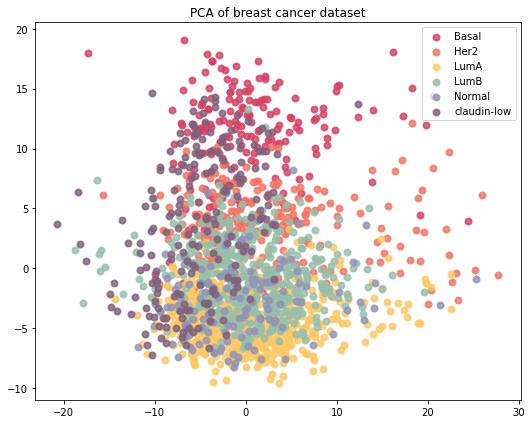

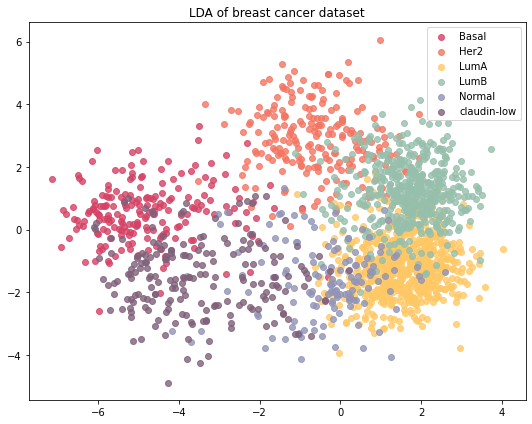

In [9]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure(figsize=(7.5, 6))

colors = ["#d54265","#f47562","#ffc865","#96bfac","#9194b6","#80607a"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8,lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of breast cancer dataset")
plt.tight_layout()
plt.savefig('../OutputPlot/PCA_gene_expression.pdf')


plt.figure(figsize=(7.5, 6))

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=0.8,label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of breast cancer dataset")
plt.tight_layout()
plt.savefig('../OutputPlot/LDA_gene_expression.pdf')
plt.show()